In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import src.visualization as vis
import importlib
importlib.reload(vis)

<module 'src.visualization' from 'D:\\Study\\GL3\\ppp\\src\\visualization.py'>

In [44]:
data = pd.read_csv('../../data/raw_data/clean_data.csv')

In [45]:
data.describe()

,Unnamed: 0,id,qid1,qid2,is_duplicate,length1,word_count1,length2,word_count2
count,401156.000000,401156.000000,401156.000000,401156.000000,401156.000000,401156.000000,401156.000000,401156.000000,401156.000000
mean,202174.182944,202174.182944,391825.319272,390157.926959,0.372025,58.833566,10.809563,58.921028,10.956224
std,116721.879211,116721.879211,228426.471997,228800.907153,0.483346,28.302079,5.100153,29.791935,5.477468
min,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101102.750000,101102.750000,193397.500000,190986.500000,0.000000,39.000000,7.000000,39.000000,7.000000
50%,202187.500000,202187.500000,390627.000000,388343.000000,0.000000,52.000000,10.000000,51.000000,9.000000
75%,303261.250000,303261.250000,589505.500000,588031.500000,1.000000,71.000000,13.000000,71.000000,13.000000
max,404350.000000,404350.000000,789800.000000,789801.000000,1.000000,200.000000,40.000000,200.000000,40.000000


In [46]:
sample = data.sample(100)

In [47]:
sample.head(10)

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,length1,word_count1,length2,word_count2
392825,395963,395963,773742,773743,I reside in India and want to earn using Onlin...,Why was Pure Pwnage cancelled?,0,124,23,30,5
104720,105560,105560,209378,209379,Why don't people like belly buttons?,Why do some people not have belly buttons?,0,36,6,42,8
61731,62219,62219,123738,123739,What are the safety precautions on handling sh...,What are the safety precautions on handling sh...,1,91,15,89,14
333321,335970,335970,658707,658708,What's your New Year resolutions for 2017 and ...,What can be my new year resolution for 2017?,1,87,16,44,9
197777,199365,199365,71734,1560,Why shouldn't I jailbreak my iPhone 4?,Why should I jailbreak my iPhone?,0,38,7,33,6
222362,224110,224110,441714,441715,Why does the United States hate Russia?,Why doesn't Russia like the United States?,0,39,7,42,7
286834,289110,289110,568094,568095,How do I prevent addiction of masturbation?,How do I stop addiction to porn?,1,43,7,32,7
213136,214825,214825,423625,423626,How difficult is it to get into cambridge?,How difficult is it for an average student to ...,0,42,8,75,14
310829,313296,313296,614909,614910,How much money can a country print every year?,How much money can country print?,1,46,9,33,6
102814,103644,103644,205597,205598,Which company provides website development ser...,Which company provides website development ser...,1,63,9,59,8


Duplicate pairs on training set: 37.2%
Number of distinct questions: 783618
Number of questions that appear multiple times: 13523



0              1
1              3
2              5
3              7
4              9
           ...  
802307    789793
802308    789795
802309    789797
802310    789799
802311    789801
Length: 802312, dtype: int64

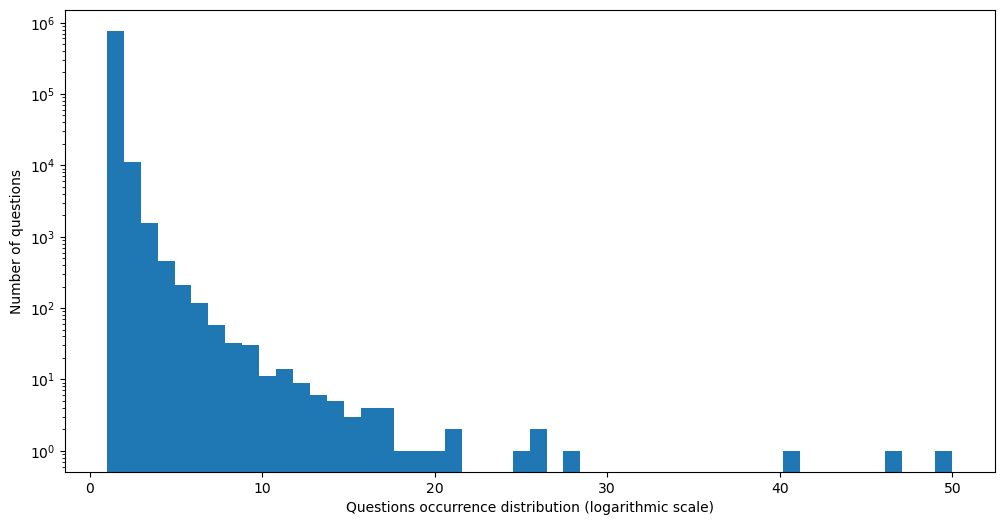

In [48]:
## Print some basic statistics
print('Duplicate pairs on training set: {}%'.format(round(data['is_duplicate'].mean()*100, 2)))

## count occurrences of identified questions on training set
qids = pd.Series(data[data['qid1'].notnull()]['qid1'].tolist() + data[data['qid2'].notnull()]['qid2'].tolist())
print('Number of distinct questions: {}'.format(len(np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(12, 6))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log')

plt.xlabel('Questions occurrence distribution (logarithmic scale)')
plt.ylabel('Number of questions')
print()
qids

In [49]:
result = sample['is_duplicate']

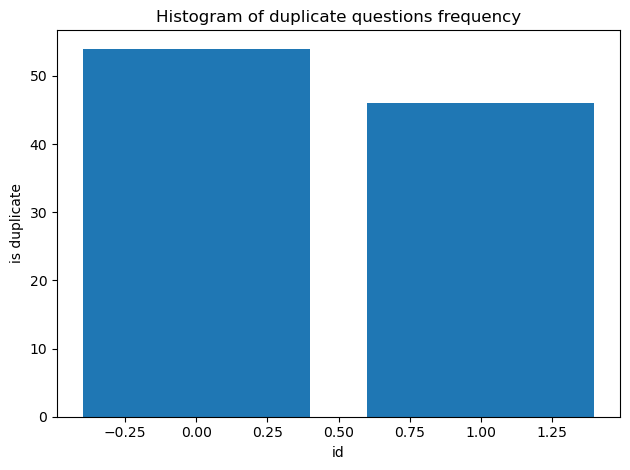

In [50]:

fig, ax = plt.subplots()
ax.hist(result, bins=[-0.5, 0.5, 1.5], rwidth=0.8)
ax.set_xlabel('id')
ax.set_ylabel('is duplicate')
ax.set_title(r'Histogram of duplicate questions frequency')
fig.tight_layout()


plt.show()

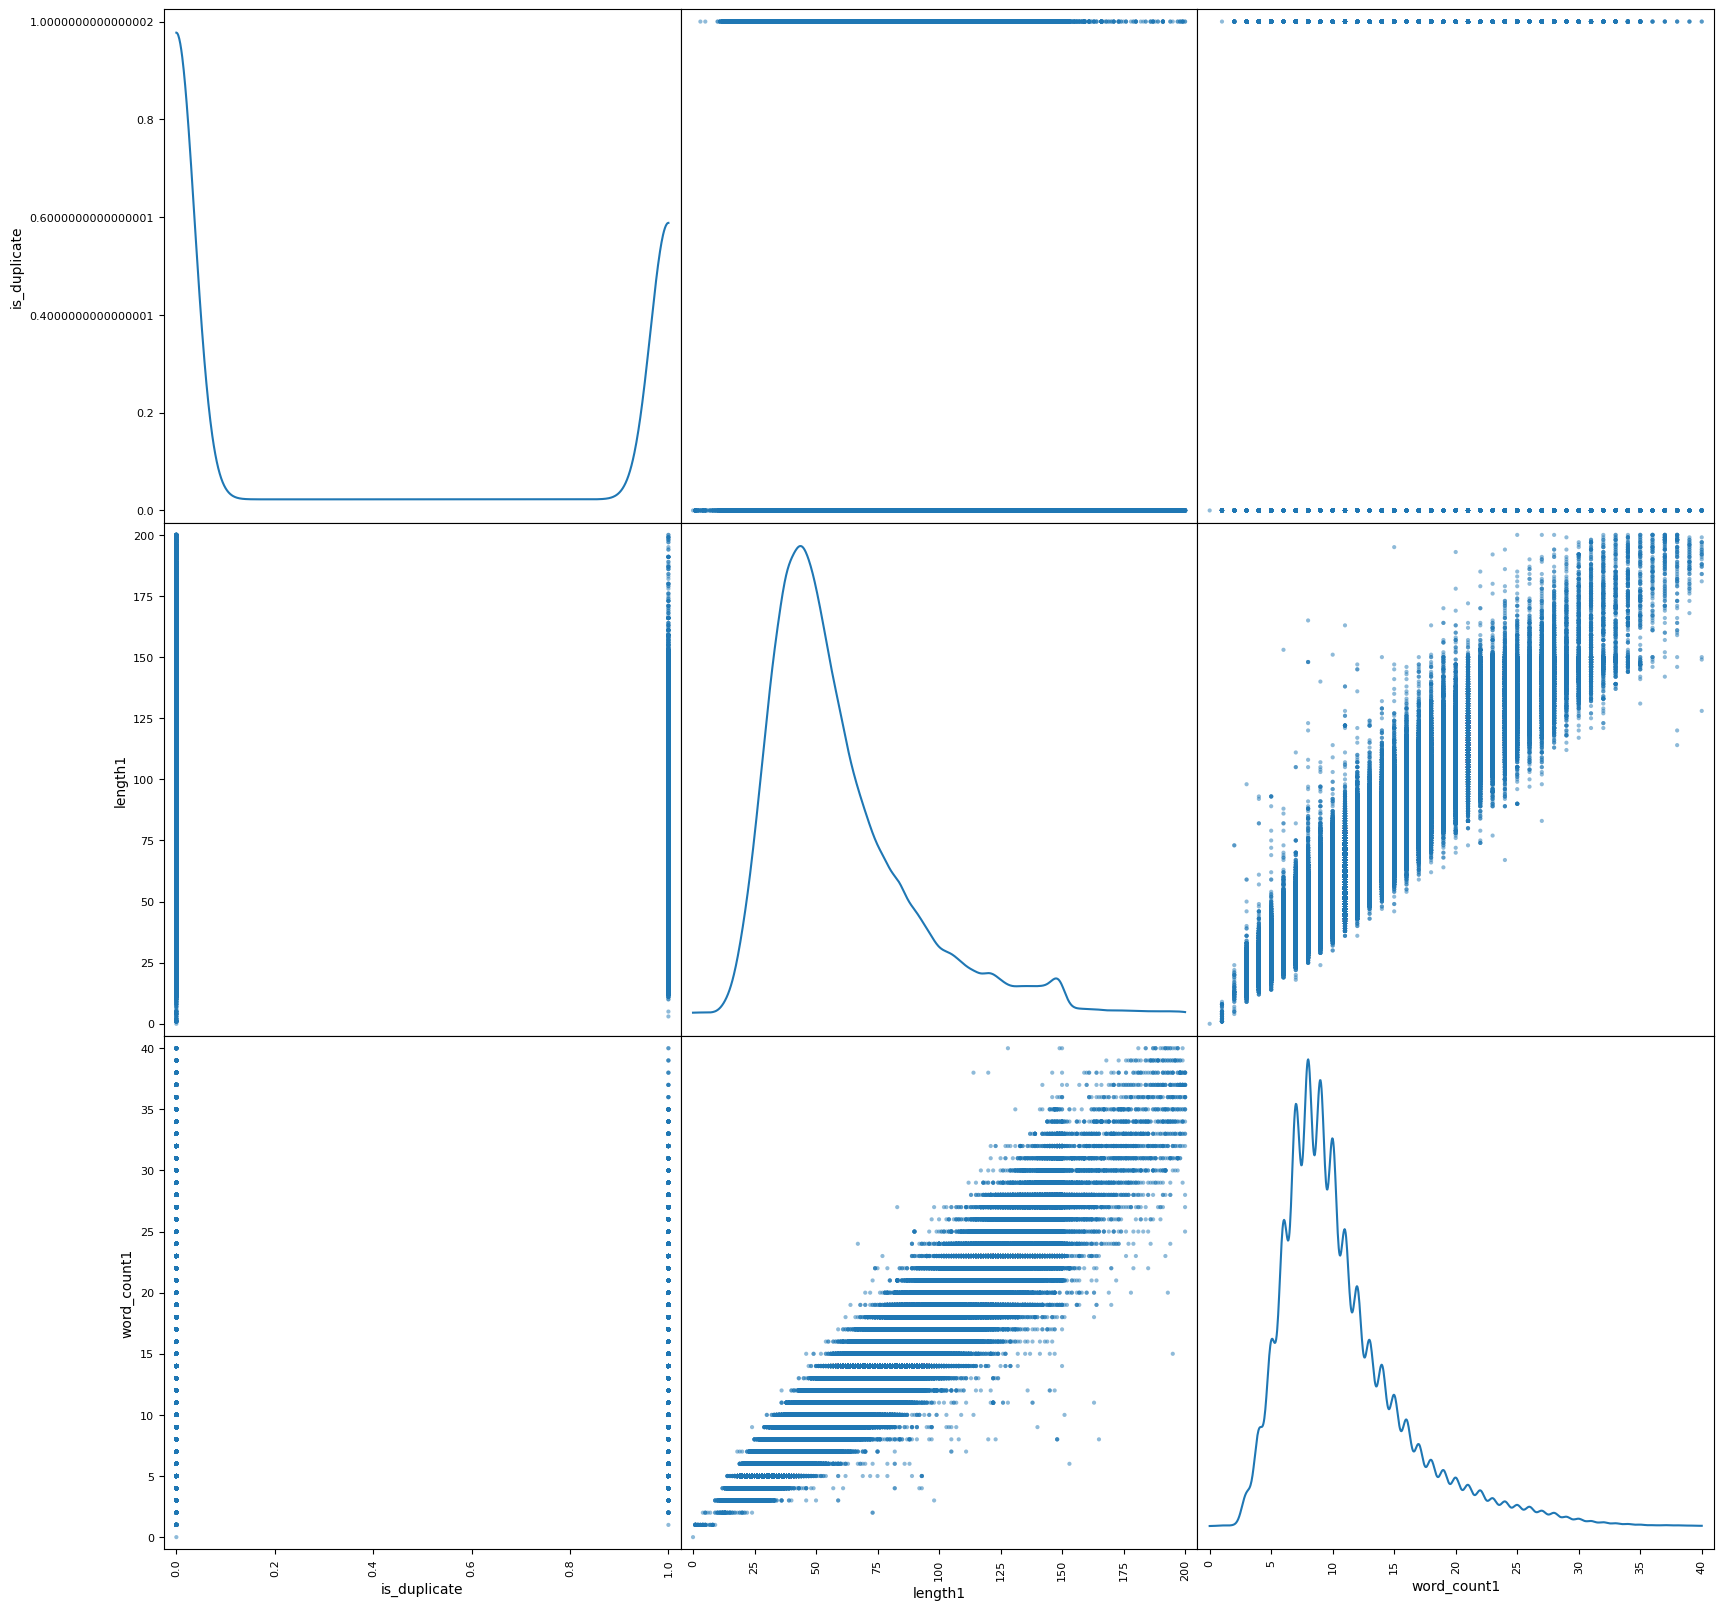

In [51]:
vis.scatterMatrix(data[["is_duplicate","length1","word_count1"]])

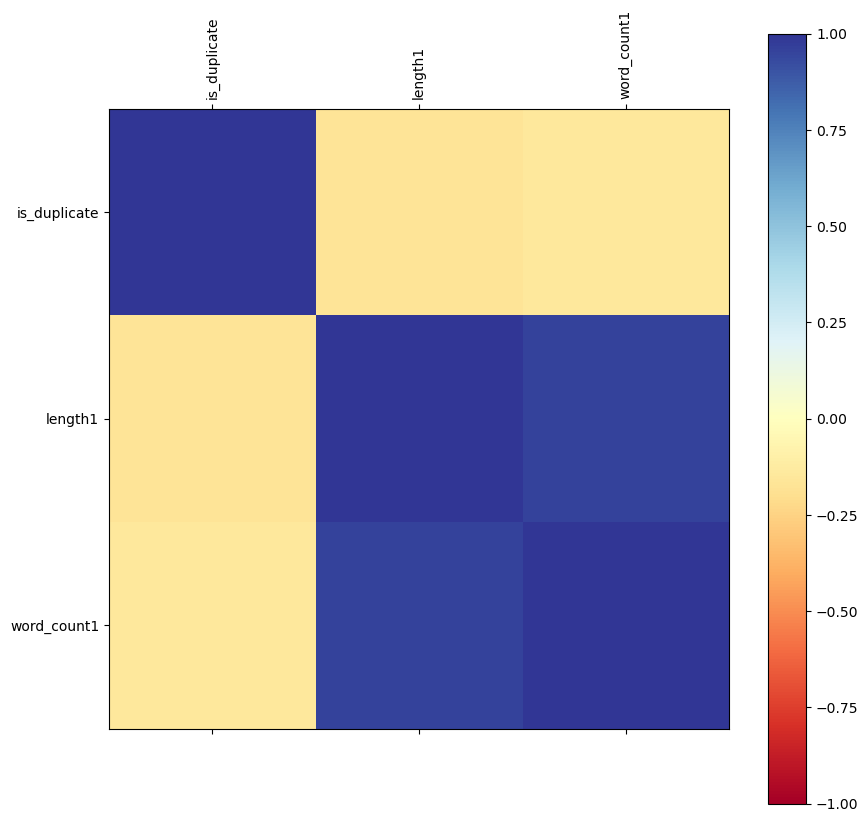

In [52]:
vis.correlationMatrix(data[["is_duplicate","length1","word_count1"]])

In [ ]:
vis.scatterMatrix(data[["is_duplicate","length2","word_count2"]])

In [ ]:
vis.correlationMatrix(data[["is_duplicate","length2","word_count2"]])